In [1]:
import numpy as np
import pandas as pd
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
# collection of machine learning algorithms



from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# Common Model Helpers
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import model_selection
import pylab as pl
from sklearn.metrics import roc_curve
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import norm
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.autograd import Variable

In [3]:
x = torch.unsqueeze(torch.linspace(-10, 10, 1000), dim=1)  
y = torch.sin(x) + 0.2*torch.rand(x.size())     

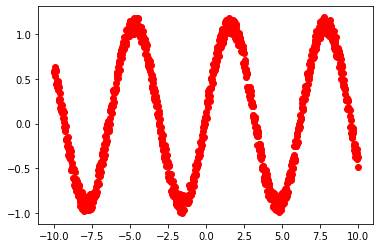

In [4]:
plt.scatter(x=x, y=y, color = "red");
plt.show()

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1,6)
        self.fc2 = nn.Linear(6,1)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=1, out_features=6, bias=True)
  (fc2): Linear(in_features=6, out_features=1, bias=True)
)


In [6]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1 )

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)

In [8]:
x_var_test = Variable(torch.FloatTensor(x_test))
y_var_test = Variable(torch.FloatTensor(y_test))
x_var_train = Variable(torch.FloatTensor(x_train))
y_var_train = Variable(torch.FloatTensor(y_train))

In [9]:
epoch = 500
model.train()
train_loss = 1000000

batch_size = 64
lossTrainList = []
epochList = []
lossTestList = []


for epochNum in range(epoch):

    optimizer.zero_grad()
    y_pred = model(x_var_train)
    loss = criterion(y_pred, y_var_train)
  
    print("Epoch {}: train loss: {}".format(epochNum, loss.item()))
    
    loss.backward()
    optimizer.step()
    
    lossVal = loss.item()*1
    
    if train_loss > lossVal:
    
        torch.save(model.state_dict(), "model.pt")
    
        lossTrainList.append(lossVal)
        epochList.append(epochNum)
        train_loss = lossVal

Epoch 0: train loss: 1.4687299728393555
Epoch 1: train loss: 6.55295991897583
Epoch 2: train loss: 7.667104244232178
Epoch 3: train loss: 145.8118896484375
Epoch 4: train loss: 502126.3125
Epoch 5: train loss: 5.11043083215831e+16
Epoch 6: train loss: inf
Epoch 7: train loss: inf
Epoch 8: train loss: nan
Epoch 9: train loss: nan
Epoch 10: train loss: nan
Epoch 11: train loss: nan
Epoch 12: train loss: nan
Epoch 13: train loss: nan
Epoch 14: train loss: nan
Epoch 15: train loss: nan
Epoch 16: train loss: nan
Epoch 17: train loss: nan
Epoch 18: train loss: nan
Epoch 19: train loss: nan
Epoch 20: train loss: nan
Epoch 21: train loss: nan
Epoch 22: train loss: nan
Epoch 23: train loss: nan
Epoch 24: train loss: nan
Epoch 25: train loss: nan
Epoch 26: train loss: nan
Epoch 27: train loss: nan
Epoch 28: train loss: nan
Epoch 29: train loss: nan
Epoch 30: train loss: nan
Epoch 31: train loss: nan
Epoch 32: train loss: nan
Epoch 33: train loss: nan
Epoch 34: train loss: nan
Epoch 35: train los

Epoch 304: train loss: nan
Epoch 305: train loss: nan
Epoch 306: train loss: nan
Epoch 307: train loss: nan
Epoch 308: train loss: nan
Epoch 309: train loss: nan
Epoch 310: train loss: nan
Epoch 311: train loss: nan
Epoch 312: train loss: nan
Epoch 313: train loss: nan
Epoch 314: train loss: nan
Epoch 315: train loss: nan
Epoch 316: train loss: nan
Epoch 317: train loss: nan
Epoch 318: train loss: nan
Epoch 319: train loss: nan
Epoch 320: train loss: nan
Epoch 321: train loss: nan
Epoch 322: train loss: nan
Epoch 323: train loss: nan
Epoch 324: train loss: nan
Epoch 325: train loss: nan
Epoch 326: train loss: nan
Epoch 327: train loss: nan
Epoch 328: train loss: nan
Epoch 329: train loss: nan
Epoch 330: train loss: nan
Epoch 331: train loss: nan
Epoch 332: train loss: nan
Epoch 333: train loss: nan
Epoch 334: train loss: nan
Epoch 335: train loss: nan
Epoch 336: train loss: nan
Epoch 337: train loss: nan
Epoch 338: train loss: nan
Epoch 339: train loss: nan
Epoch 340: train loss: nan
E

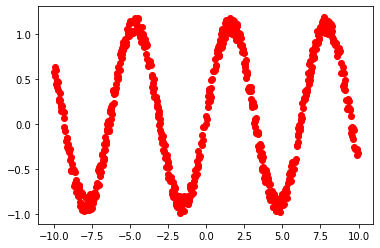

In [10]:
plt.scatter(x=x_var_train.detach().numpy(), y=y_train.detach().numpy(), color = "red");
plt.scatter(x=x_var_train.detach().numpy(), y=y_pred.detach().numpy(), color = "green")
plt.show()

In [11]:
y_pred

tensor([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [n